# Project 1 – Replication Project

## Contents
- [Information](#Information)
- [Data Preprocessing](#Data-Preprocessing)
- [Multiple Linear Regression](#Multiple-Linear-Regression)

## Information

The paper asks whether universal basic income or targeted cash transfers should be implemented. The paper looks at evidence from Indonesia and Peru. There are tradeoffs between the universal approach and the targeted approach. The targeted approach uses proxy measures for income (since in poor countries income data is often not available), which leads to inclusion as well as exclusion errors. Universal programs are easier to implement, but they do not specifically target the poor. Advantages of universal programs are ease of implementation and low administrative costs (no verification of income necessary). Such a universal program could be implemented through a tax system. However, in poor countries, where many people are below the tax threshold, the burden would fall on very few people. If these are particularly productive people this may have large negative consequences. On the other hand, there are targeted programs. A proxy means test is when a proxy for income is observed and households are targeted based on this. Typically large censuses are conducted with door-to-door visits asking about stuff like the assets households own. Seldomly, self-reporting and unverified income are used, since lying is very easy. The assets collected from the census are then used to predict income or consumption. The steps in which this works are the following. The government takes a dataset, which was collected in a low-stakes context such that there was no incentive to lie and takes a proxy-means census. Then a regression is estimated with poverty (income or consumption) as the dependent variable and assets as the explanatory variables. The government sets a threshold for eligibility and distributes benefits to all households with predicted incomes below the threshold. This will lead to inclusion and exclusion errors. Depending on the policy context, either a universal basic income or a targeted program may dominate the other.

For Peru, the paper focuses on the Juntos program, which is a conditional cash transfer to mothers designed to subsidize child health and education. Beneficiary households receive a monthly transfer of 100 soles (approximately $30). This program targets roughly one third of the population. For Peru, the dataset consists of household-level data from the Peruvian National Household Survey (ENAHO), for the years 2010-2011. The Peru dataset consists of 46'305 households. The dataset/survey contains a set of asset variables (72 variables) as well as a measure of actual per capita consumption.

The dataset is randomly divided into equally sized training and test sets. Then for the training set monthly household per capita consumption is regressed on the indicator variables. Next monthly per capita consumption is predicted for the test set using coefficients from the training regression. This gives the predicted per capita consumption.

In Peru households below the poverty line in Peru (about 28 percent of our sample) are targeted.

## Data Preprocessing

We begin by importing the libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.lines as mlines
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from stargazer.stargazer import Stargazer

Next we read in the dataset and save it under data.

In [8]:
data = pd.read_csv('/users/nikolas.anic/Desktop/Machine_Learning_Economic_Analysis_FS20/peru_matlab_export_full.csv')



We set the display option to show all rows and all columns.

In [9]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

We can take a look at the head of the data.

In [10]:
data.head()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_other,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_other,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_0,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_lessthan1,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,5.351858,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,211.0000,0,1,1,233710511,5.246471,284.4243
1,5.768755,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,320.1389,0,3,2,295508011,6.129468,522.8840
2,5.968277,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,390.8318,0,4,3,257600211,6.665577,878.4961
3,5.654599,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,285.6018,1,9,4,198104311,6.088295,567.4705
4,4.771289,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,118.0713,1,8,5,24805311,5.008170,115.4929


We can also look at the head of the data with all columns.

In [11]:
display(data.head())

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_other,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_other,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_0,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_lessthan1,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
0,5.351858,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,211.0000,0,1,1,233710511,5.246471,284.4243
1,5.768755,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,320.1389,0,3,2,295508011,6.129468,522.8840
2,5.968277,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,390.8318,0,4,3,257600211,6.665577,878.4961
3,5.654599,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,285.6018,1,9,4,198104311,6.088295,567.4705
4,4.771289,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,118.0713,1,8,5,24805311,5.008170,115.4929


We can take a look at the data types.

In [12]:
data.dtypes

lnpercapitaconsumption     float64
d_fuel_other                 int64
d_fuel_wood                  int64
d_fuel_coal                  int64
d_fuel_kerosene              int64
d_fuel_gas                   int64
d_fuel_electric              int64
d_fuel_none                  int64
d_water_other                int64
d_water_river                int64
d_water_well                 int64
d_water_truck                int64
d_water_pylon                int64
d_water_outside              int64
d_water_inside               int64
d_drain_none                 int64
d_drain_river                int64
d_drain_cesspool             int64
d_drain_septic               int64
d_drain_outside              int64
d_drain_inside               int64
d_wall_other               float64
d_wall_woodmat             float64
d_wall_stonemud            float64
d_wall_quincha             float64
d_wall_tapia               float64
d_wall_adobe               float64
d_wall_stonecement         float64
d_wall_brickcement  

We get summary statistics on the columns

In [13]:
data.describe()

,lnpercapitaconsumption,d_fuel_other,d_fuel_wood,d_fuel_coal,d_fuel_kerosene,d_fuel_gas,d_fuel_electric,d_fuel_none,d_water_other,d_water_river,d_water_well,d_water_truck,d_water_pylon,d_water_outside,d_water_inside,d_drain_none,d_drain_river,d_drain_cesspool,d_drain_septic,d_drain_outside,d_drain_inside,d_wall_other,d_wall_woodmat,d_wall_stonemud,d_wall_quincha,d_wall_tapia,d_wall_adobe,d_wall_stonecement,d_wall_brickcement,d_roof_other,d_roof_straw,d_roof_mat,d_roof_platecane,d_roof_tile,d_roof_wood,d_roof_concrete,d_floor_other,d_floor_earth,d_floor_cement,d_floor_wood,d_floor_tile,d_floor_sheets,d_floor_parquet,d_electricity,d_telephone,d_h_educ_none,d_h_educ_pre,d_h_educ_prim,d_h_educ_sec,d_h_educ_higher_nouni,d_h_educ_higher_uni,d_h_educ_post,d_max_educ_none,d_max_educ_prim,d_max_educ_sec,d_max_educ_higher_nouni,d_max_educ_higher_uni,d_insurance_0,d_insurance_1,d_insurance_2,d_insurance_3,d_insurance_4plus,d_crowd_lessthan1,d_crowd_1to2,d_crowd_2to4,d_crowd_4to6,d_crowd_6plus,d_lux_0,d_lux_1,d_lux_2,d_lux_3,d_lux_4,d_lux_5,training,percapitaconsumption,poor,h_hhsize,id_for_matlab,hhid,lncaphat_OLS,percapitahat_OLS
count,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,46305.000000,46305.000000,46301.000000,46301.000000,46301.000000,46301.000000,46301.000000,46301.000000,46301.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,45382.000000,45382.000000,45382.000000,45382.000000,45382.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,46305.000000,4.630500e+04,45378.000000,45378.000000
mean,5.856564,0.104244,0.307202,0.025656,0.004557,0.518734,0.007796,0.031811,0.041421,0.207947,0.040341,0.017320,0.019285,0.064291,0.609394,0.149552,0.021682,0.135730,0.155750,0.059281,0.472692,0.050483,0.113591,0.013067,0.023512,0.100304,0.299348,0.006038,0.393658,0.012009,0.071372,0.013243,0.499714,0.118571,0.013860,0.271231,0.011987,0.394121,0.404323,0.079701,0.057181,0.030364,0.022322,0.837728,0.204557,0.080689,0.000216,0.382411,0.331742,0.103000,0.088249,0.013693,0.032372,0.171234,0.405075,0.169766,0.197041,0.179117,0.163632,0.163784,0.150610,0.342857,0.300119,0.427020,0.205831,0.047882,0.019149,0.544974,0.193845,0.113703,0.067293,0.043797,0.036389,0.500011,461.243627,0.280207,4.012094,23153.000000,1.869936e+08,5.850041,459.121087
std,0.744232,0.305580,0.461339,0.158108,0.067350,0.499654,0.087952,0.175498,0.199264,0.405843,0.196760,0.130462,0.137527,0.245273,0.487891,0.356635,0.145646,0.342506,0.362622,0.236152,0.499259,0.218941,0.317318,0.113562,0.151523,0.300408,0.457977,0.077468,0.488566,0.108928,0.257448,0.114316,0.500005,0.323287,0.116912,0.444600,0.108829,0.488666,0.490766,0.270833,0.232191,0.171590,0.147729,0.368704,0.403382,0.272360,0.014695,0.485981,0.470844,0.303962,0.283659,0.116214,0.176989,0.376718,0.490912,0.375431,0.397768,0.383454,0.369946,0.370083,0.357672,0.474669,0.458315,0.494651,0.404312,0.213520,0.137049,0.497979,0.395313,0.317453,0.250531,0.204644,0.187258,0.500005,411.392663,0.449105,2.093215,13367.246444,1.111905e+08,0.605646,293.660061
min,2.110213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

We can get some further information on our dataset.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46305 entries, 0 to 46304
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   lnpercapitaconsumption   46305 non-null  float64
 1   d_fuel_other             46305 non-null  int64  
 2   d_fuel_wood              46305 non-null  int64  
 3   d_fuel_coal              46305 non-null  int64  
 4   d_fuel_kerosene          46305 non-null  int64  
 5   d_fuel_gas               46305 non-null  int64  
 6   d_fuel_electric          46305 non-null  int64  
 7   d_fuel_none              46305 non-null  int64  
 8   d_water_other            46305 non-null  int64  
 9   d_water_river            46305 non-null  int64  
 10  d_water_well             46305 non-null  int64  
 11  d_water_truck            46305 non-null  int64  
 12  d_water_pylon            46305 non-null  int64  
 13  d_water_outside          46305 non-null  int64  
 14  d_water_inside        

We check how many missing values there are for each column.

In [15]:
data.isna().sum()

lnpercapitaconsumption       0
d_fuel_other                 0
d_fuel_wood                  0
d_fuel_coal                  0
d_fuel_kerosene              0
d_fuel_gas                   0
d_fuel_electric              0
d_fuel_none                  0
d_water_other                0
d_water_river                0
d_water_well                 0
d_water_truck                0
d_water_pylon                0
d_water_outside              0
d_water_inside               0
d_drain_none                 0
d_drain_river                0
d_drain_cesspool             0
d_drain_septic               0
d_drain_outside              0
d_drain_inside               0
d_wall_other               923
d_wall_woodmat             923
d_wall_stonemud            923
d_wall_quincha             923
d_wall_tapia               923
d_wall_adobe               923
d_wall_stonecement         923
d_wall_brickcement         923
d_roof_other               923
d_roof_straw               923
d_roof_mat                 923
d_roof_p

We check the shape of our dataset.

In [16]:
data.shape

(46305, 81)

table presents the training regression used to predict household income (for Peru) in Figures 3-7. Omitted categories are the following dummies: 
- less than 1 household member per room; 
- 0 of 5 luxury goods owned; 
- other type of fuel used for cooking; 
- water source: other;
- drainage source: other; 
- wall type: other; 
- roof type: other; 
- floor type: other; 
- head of household has no education; 
- 0 household members affiliated to health insurance.


We drop the columns we don't need.

In [17]:
data <- data.drop(['percapitaconsumption','d_fuel_other','d_water_other','d_wall_other','d_roof_other','d_floor_other','d_insurance_0','d_crowd_lessthan1','d_lux_0','training','id_for_matlab','hhid','lncaphat_OLS','percapitahat_OLS'], axis = 1, inplace = True)


TypeError: bad operand type for unary -: 'NoneType'

In [18]:
data.shape

(46305, 67)

In [19]:
data.isna().sum()

lnpercapitaconsumption       0
d_fuel_wood                  0
d_fuel_coal                  0
d_fuel_kerosene              0
d_fuel_gas                   0
d_fuel_electric              0
d_fuel_none                  0
d_water_river                0
d_water_well                 0
d_water_truck                0
d_water_pylon                0
d_water_outside              0
d_water_inside               0
d_drain_none                 0
d_drain_river                0
d_drain_cesspool             0
d_drain_septic               0
d_drain_outside              0
d_drain_inside               0
d_wall_woodmat             923
d_wall_stonemud            923
d_wall_quincha             923
d_wall_tapia               923
d_wall_adobe               923
d_wall_stonecement         923
d_wall_brickcement         923
d_roof_straw               923
d_roof_mat                 923
d_roof_platecane           923
d_roof_tile                923
d_roof_wood                923
d_roof_concrete            923
d_floor_

We drop all rows with missing values.

In [20]:
data.dropna(axis=0,inplace=True)

In [21]:
data.shape

(45378, 67)

In [22]:
data.isna().sum()

lnpercapitaconsumption     0
d_fuel_wood                0
d_fuel_coal                0
d_fuel_kerosene            0
d_fuel_gas                 0
d_fuel_electric            0
d_fuel_none                0
d_water_river              0
d_water_well               0
d_water_truck              0
d_water_pylon              0
d_water_outside            0
d_water_inside             0
d_drain_none               0
d_drain_river              0
d_drain_cesspool           0
d_drain_septic             0
d_drain_outside            0
d_drain_inside             0
d_wall_woodmat             0
d_wall_stonemud            0
d_wall_quincha             0
d_wall_tapia               0
d_wall_adobe               0
d_wall_stonecement         0
d_wall_brickcement         0
d_roof_straw               0
d_roof_mat                 0
d_roof_platecane           0
d_roof_tile                0
d_roof_wood                0
d_roof_concrete            0
d_floor_earth              0
d_floor_cement             0
d_floor_wood  

## Multiple Linear Regression

In [23]:
cons = np.array(data.lnpercapitaconsumption)
p = np.percentile(cons, 35) 
p

5.5721963

### Analysis with conitnuous data in y

We set per capita consumption as the dependent variable and the rest of the columns as the explanatory variables.

In [25]:
X = data.drop(['lnpercapitaconsumption', 'poor', 'h_hhsize'],axis=1)
y = data['lnpercapitaconsumption']

We split the dataset into training and test sets.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [28]:
reg = sm.OLS(y, sm.add_constant(X)).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     lnpercapitaconsumption   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.658
Method:                     Least Squares   F-statistic:                     1385.
Date:                    Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                            14:31:54   Log-Likelihood:                -26825.
No. Observations:                   45378   AIC:                         5.378e+04
Df Residuals:                       45314   BIC:                         5.434e+04
Df Model:                              63                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.3945      0.044    123.555      0.000       5.309       5.480
d_fuel_wood                 0.0630      0.008      8.345      0.000       0.048       0.078
d_fuel_coal                 0.2390      0.015     15.683      0.000       0.209       0.269
d_fuel_kerosene             0.2510      0.032      7.883      0.000       0.189       0.313
d_fuel_gas                  0.3059      0.009     33.614      0.000       0.288       0.324
d_fuel_electric             0.6262      0.025     24.578      0.000       0.576       0.676
d_fuel_none                 0.4610      0.014     32.325      0.000       0.433       0.489
d_water_river              -0.0784      0.012     -6.814      0.000      -0.101      -0.056
d_water_well               -0.0322      0.015     -2.206      0.027      -0.061      -0.004
d_water_truck               0.0722      0.019      3.843      0.000       0.035       0.109
d_water_pylon               0.0064      0.018      0.352      0.725      -0.029       0.042
d_water_outside             0.0672      0.019      3.474      0.001       0.029       0.105
d_water_inside             -0.0115      0.011     -1.051      0.293      -0.033       0.010
d_drain_none               -0.1853      0.029     -6.317      0.000      -0.243      -0.128
d_drain_river              -0.1455      0.032     -4.584      0.000      -0.208      -0.083
d_drain_cesspool           -0.1499      0.029     -5.125      0.000      -0.207      -0.093
d_drain_septic             -0.1675      0.029     -5.720      0.000      -0.225      -0.110
d_drain_outside            -0.1164      0.034     -3.452      0.001      -0.182      -0.050
d_drain_inside             -0.1077      0.029     -3.695      0.000      -0.165      -0.051
d_wall_woodmat              0.0808      0.012      6.993      0.000       0.058       0.103
d_wall_stonemud            -0.1082      0.021     -5.230      0.000      -0.149      -0.068
d_wall_quincha              0.0228      0.017      1.370      0.171      -0.010       0.055
d_wall_tapia               -0.1833      0.012    -15.110      0.000      -0.207      -0.160
d_wall_adobe               -0.1278      0.011    -11.876      0.000      -0.149      -0.107
d_wall_stonecement         -0.0548      0.028     -1.927      0.054      -0.111       0.001
d_wall_brickcement         -0.0327      0.012     -2.784      0.005      -0.056      -0.010
d_roof_straw               -0.1492      0.021     -7.107      0.000      -0.190      -0.108
d_roof_mat                  0.0024      0.026      0.094      0.925      -0.049       0.053
d_roof_platecane           -0.0037      0.019     -0.191      0.848      -0.041       0.034
d_roof_tile                -0.0731      0.020     -3.614      0.000      -0.113      -0.033
d_r

In [29]:
predicted = reg.predict(sm.add_constant(X))

We plot our predictions against actual values.

In [30]:
reg2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
pred = reg2.predict(sm.add_constant(X_test))

mean_squared_error(pred, y_test)

0.1922838890699202

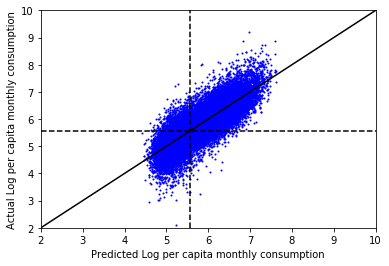

In [31]:
x, y_test = pred, y_test
fig, ax = plt.subplots()
ax.scatter(x, y_test, c='blue', s = 1)
line = mlines.Line2D([0, 1], [0, 1], color='black')
ax.axhline(y=p, color='black', linestyle='dashed')
ax.axvline(x=p, color='black', linestyle='dashed')
ax.set_xlabel('Predicted Log per capita monthly consumption')
ax.set_ylabel('Actual Log per capita monthly consumption')
axes = plt.gca()
axes.set_xlim([2,10])
axes.set_ylim([2,10])
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

### Inclusion vs. Exclusion Error

In [32]:
dat = np.array(predicted)
dat2 = np.array(y)
hh_size = data['h_hhsize']
df = pd.DataFrame({'Predicted_values':dat, 'Actual_values':dat2, 'hh_size':hh_size})

In [33]:
FP = df[(df['Predicted_values'] < p) & (df['Actual_values'] > p)].count()
TN_FP = df[df['Actual_values'] > p].count()
FP_ratio = FP / TN_FP
inclusion_error = FP_ratio

In [34]:
FN = df[(df['Predicted_values'] > p) & (df['Actual_values'] < p)].count()
TP_FN = df[df['Actual_values'] < p].count()
TP_ratio = FN / TP_FN
exclusion_error = TP_ratio
exclusion_error

Predicted_values    0.206082
Actual_values       0.206082
hh_size             0.206082
dtype: float64

In [969]:
incl_error = []
one_minus_excl_error = []
cutoff = []
fp = []
tn_fp = []
eligibility = []

# First, we define a for loop which calculates for each cutoff value the respective True Positive and False Positive rates

Ks = 100

for i in np.arange(1,Ks, 1): 
    
    cons = np.array(data.lnpercapitaconsumption)
    p = np.percentile(cons, i) 
    
    # Here we calculate the inclusion error
    
    FP = np.sum(np.where(((df['Predicted_values'] < p) & (df['Actual_values'] > p)), df['hh_size'], 0))
    TN_FP = np.sum(np.where(df['Actual_values'] > p, df['hh_size'], 0))
    FP_ratio = FP / TN_FP
    inclusion_error = FP_ratio
    
    # Here, we calculate the 1 - exclusion error
    
    FN = np.sum(np.where(((df['Predicted_values'] > p) & (df['Actual_values'] < p)), df['hh_size'], 0))
    TP_FN = np.sum(np.where(df['Actual_values'] < p, df['hh_size'], 0))
    TP_ratio = FN / TP_FN
    one_minus_exclusion_error = 1 - TP_ratio
    
    # We further define the eligibility threshold
    
    eligible_hh = np.sum(np.where(df["Predicted_values"] < p, df["hh_size"], 0))
    
    incl_error.append(inclusion_error)
    one_minus_excl_error.append(one_minus_exclusion_error)
    cutoff.append(p)
    fp.append(FP)
    tn_fp.append(TN_FP)
    eligibility.append(eligible_hh)

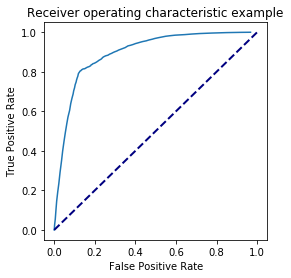

In [970]:
# Here, we set arrays including the inclusion and exclusion error for the different eligibility thresholds

incl_error = np.array(incl_error)
excl_error = np.array(one_minus_excl_error)
elig = np.array(eligibility)

df1 = pd.DataFrame(incl_error, columns = ["inclusion_error"])

df2 = pd.DataFrame(excl_error, columns = ["exclusion_error"])

lw = 2
fig, ax = plt.subplots(figsize = (4,4))
ax.plot(df1, df2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.show()


## Benefits per HH vs. Inclusion Error

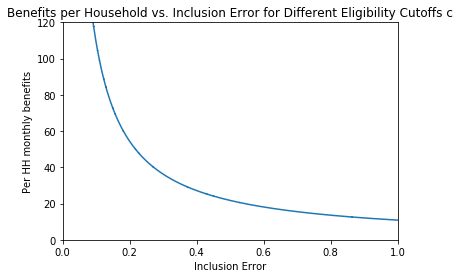

In [957]:
# We define the benefits per household by dividing the monthly budget by the inclusion error times the overall households

# The idea is that, in case of UBI, each household gets a piece of the pie. This is declining with an increasing inclusion error
# This is analogous to defining individual eligibility thresholds, as, in the previous code section, we set the 
# inclusion errors in relation to the eligibility thresholds. 

df2["eligible_hh"] = (880000000/12) /(df2 * 6750000)
df2["cutoff_value"] = cutoff
plt.plot(df2.exclusion_error, df2.eligible_hh)
plt.xlabel('Inclusion Error')
plt.ylabel('Per HH monthly benefits')
plt.title('Benefits per Household vs. Inclusion Error for Different Eligibility Cutoffs c')
plt.axis([0,1, 0, 120])
plt.show()

## Social Welfare

In [112]:
peru = pd.read_csv("/users/nikolas.anic/Desktop/Machine_Learning_Economic_Analysis_FS20/peru_results_own_pred.csv")

Ks = 100

u = []
incl_error = []
B= []
incomes = []

rho = 3
monthly_budget = 880000000/12
hh = 6750000
total_sample = 182215
bonus_hh = 2.253 /12

# Here, we calculate the function for the social welfare graph. 

# We again start by introducing a loop to the function that gives us the different utilities per cutoff value. 

for i in np.arange(1, Ks, 0.1):
    
 # Here, we again define the different inclusion errors per eligibility cutoff.
    FP = np.sum(np.where(((peru['lncaphat_OLS'] < p) & (peru['lnpercapitaconsumption'] > p)),peru['h_hhsize'] , 0))
    TN_FP = np.sum(np.where(peru['lnpercapitaconsumption'] > p, peru['h_hhsize'], 0))
    FP_ratio = FP / TN_FP
    inclusion_error = FP_ratio
    
# Here below, we then define the code to replicate the utility scores. 
    
    cons = peru.percapitaconsumption
    p = np.percentile(peru['lnpercapitaconsumption'], i)
    incl_p = peru['lnpercapitaconsumption'] < p
    num_incl = incl_p * peru['h_hhsize']
    hh_incl = np.sum(incl_p[peru['training'] == 1])
    pct_hh_incl = hh_incl / total_sample
    national_hh_incl = hh * pct_hh_incl
    per_hh_benefits = monthly_budget / national_hh_incl
# Important: Also include the bonus for UBI settings
    benefits = incl_p * per_hh_benefits + bonus_hh*np.where(inclusion_error == 1, 1, 0)
    percapita_benefits = benefits / peru['h_hhsize']
    income = cons + percapita_benefits
    Income = income[peru['training'] == 1]
    utility = (np.sum(Income**(1-rho)))/(1-rho)
    u.append(utility)
    incl_error.append(inclusion_error)
    

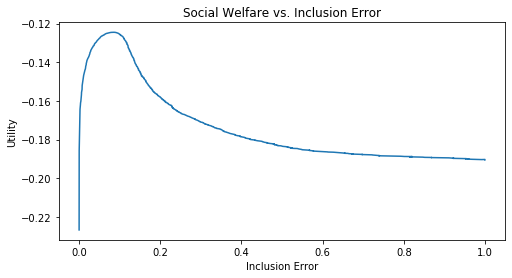

In [113]:
utility = np.array(u)
incl_error = np.array(incl_error)

df1 = pd.DataFrame(incl_error)
df2 = pd.DataFrame(utility)
df2 = df2.iloc[1:,:]
df1 = df1.iloc[1:,:]

lw = 2
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(df1, df2)
plt.xlabel('Inclusion Error')
plt.ylabel('Utility')
plt.title('Social Welfare vs. Inclusion Error')

plt.show()

## Decision Trees

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
from six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

In [93]:
cons = np.array(data.lnpercapitaconsumption)
p = np.percentile(cons, 35) 
p

5.5721963

## Decision Tree - Regression

In [111]:
X = data.drop(['lnpercapitaconsumption'],axis=1)
y = data['lnpercapitaconsumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

dlf = DecisionTreeRegressor(max_depth=7, min_samples_split = 7, max_features= 21, min_samples_leaf = 2, 
                            splitter = 'random', random_state=1)
dlf.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=21,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='random')

In [95]:
pred = dlf.predict(X)
mean_squared_error(y, pred)

NameError: name 'dlf' is not defined

In order to get a more nuanced tree model, we can use different forms of hyperparameter tuning. Here, we follow a step-by-step approach in which we will choose each optimal hyperparameter value at a time and then add a different range for the second parameter until we created a forward-based selection on hyperparameters which appears to be optimal for our model. 

To ensure that the data generation process is robust, we introduce a cross-val-score, where we use a 10-Fold CV to obtain a mean value from different train-validation sample splits. 

We start by looking at the maximum depth of a decision tree. The max_depth indicates the maximum nodes, or splits, that the tree can take. The advantage of increasing the number of splits is that the tree will become more precise and fit the trainings data better as it can more thoroughly learn the specification of each observations since it has a wider range of attributes to choose from. As a consequence, the bias will automatically decline with an increasing number of splits and depth. 

The disadvantage in said case is that it can the model becomes prone of overfitting, as it depicts the underlying data structure with such a precision that it becomes unable to generalize the results on an independent sample. 

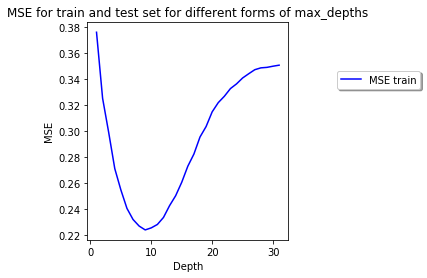

In [96]:
from sklearn.metrics import roc_curve, auc
max_depths = 32
range_depths = range(1,32)

train_results = []


for i in range(1,32):
    clf = DecisionTreeRegressor(max_depth=i, splitter = 'random', random_state = 1)
    scores_train = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
    train_results.append((scores_train.mean()))

    
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range_depths, np.array(train_results) *-1, 'b', label = "MSE train")
plt.title('Legend outside')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.title('MSE for train and test set for different forms of max_depths')
plt.show()


In [97]:
clf = DecisionTreeRegressor(max_depth=7, splitter = 'random', random_state = 1)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
mean_squared_error(y_test, preds)

0.23071486616762513

As we can see, the training error declines and finds its minimum value approximately at the a maximum depth of 7. If we calculate the according test error, we retrieve a value of 0.234.

Now, we can further fine tune the decision tree by going over to the next hyperparameter, which is min_samples_split. It indicates the minimum number of samples required to perform a split. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

In [98]:
min_splits = 1.0
range_depths = np.arange(0.01,1.0, 0.01)

train_results = []


for i in np.arange(0.01,1.0, 0.05):
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=i, splitter = 'random', random_state = 1)
    scores_train = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
    train_results.append((scores_train.mean()))
    

Let's consider a smaller range. We now analyse only from 0.01 to 0.1 but with smaller step sizes.

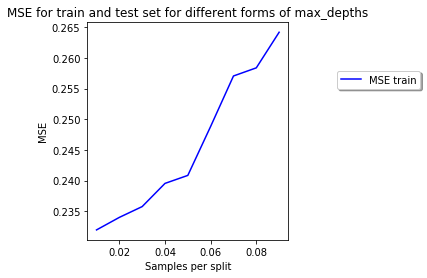

In [99]:
range_min = np.arange(0.01,0.1, 0.01)

train_results = []

for i in np.arange(0.01,0.1, 0.01):
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=i, splitter = 'random', random_state = 1)
    scores_train = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
    train_results.append((scores_train.mean()))

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range_min, np.array(train_results) *-1, 'b', label = "MSE train")
plt.title('Legend outside')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('Samples per split')
plt.ylabel('MSE')
plt.title('MSE for train and test set for different forms of max_depths')
plt.show()

We can consider that 0.01 is an optimal split value for minimal values. The importance here is to distinguish between bias and variance. One issue we could face is that, since we require smaller sample sizes to be a necessary basis for a split, we can further fine-tune the tree with the risk of overfitting the model. Therfore, lets look at some test errors: 

In [100]:
test_errors = []

for i in np.arange(0.0001,0.1, 0.01):
    
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=i,splitter = 'random', random_state = 1)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    test_errors.append(mse)

test_errors

[0.23068157082373636,
 0.2321381450409924,
 0.2351064556278697,
 0.2368891385316984,
 0.23974631131852775,
 0.24288822778777308,
 0.25200939805900524,
 0.26344268788342234,
 0.26459772088185385,
 0.27059269650301865]

We can conclude that here the minimum split size is optimal. 

Now, consider the min_samples_leaf. It is the minimum number of samples required to be at a leaf node. This parameter is similar to min_samples_splits, however, this describe the minimum number of samples of samples at the leafs, the base of the tree. Increasing the number of minimal samples will automatically reduce the "spreading of the tree". 

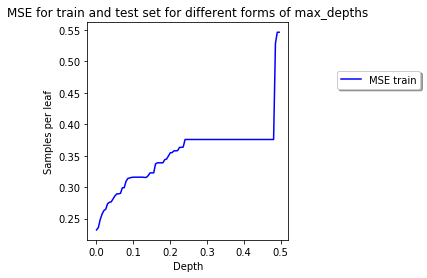

In [101]:
range_tree_nodes = np.arange(0.001, 0.5, 0.005)

train_results = []

for i in np.arange(0.001,0.5, 0.005):
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=0.01, min_samples_leaf = i, splitter = 'random', random_state = 1)
    scores_train = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
    train_results.append((scores_train.mean()))

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(range_tree_nodes, np.array(train_results) *-1, 'b', label = "MSE train")
plt.title('Legend outside')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('Depth')
plt.ylabel('Samples per leaf')
plt.title('MSE for train and test set for different forms of max_depths')
plt.show()

We can show that the smaller the minimum required sample leaf, the smaller the training error. This is intuitive as we can, as in the example before, create a better fine-tuning. Let's look again at the current test error:

In [102]:
test_errors = []

for i in np.arange(0.0001,0.5, 0.005):
    
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=0.01,min_samples_leaf = i, splitter = 'random', random_state = 1)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    test_errors.append(mse)

np.asarray(test_errors).min()

0.2321381450409924

As we can see here again, choosing too high values of the min_samples_leaf could lead to underfitting, which is why we use the value of 0.001, indicating that the tree can be split more often. 

Lastly, we look at max_features. It represents the number of features to consider when looking for the best split.

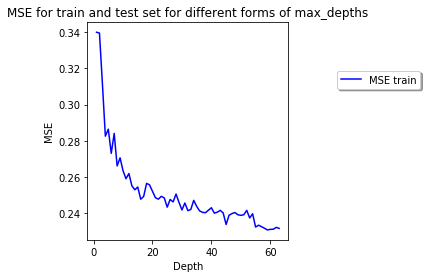

In [103]:
max_features = np.arange(1, X_train.shape[1])

train_results = []

for i in np.arange(1, X_train.shape[1]):
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=0.0001, min_samples_leaf = 0.0001, max_features = i, splitter = 'random', random_state = 1)
    scores_train = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='neg_mean_squared_error')
    train_results.append((scores_train.mean()))

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(max_features, np.array(train_results) *-1, 'b', label = "MSE train")
plt.title('Legend outside')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.xlabel('Depth')
plt.ylabel('MSE')
plt.title('MSE for train and test set for different forms of max_depths')
plt.show()

In [104]:
test_errors = []

for i in np.arange(1, X_train.shape[1]):
    
    clf = DecisionTreeRegressor(max_depth=7, min_samples_split=0.0001,min_samples_leaf = 0.00001, max_features = i, splitter = 'random', random_state = 1)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    test_errors.append((i, mse))

np.asarray(test_errors).min()

0.2305248288979806

As we can see, given all other estimators, we retrieve the best MSE for the test set given the values of the training set at a max_feature of 58, with an MSE off 0.2297. 

Now, let's put everything together and obtain the best possible MSE for the decision tree regressor: 

In [105]:
max_depth=7
min_samples_split=0.01
min_samples_leaf = 0.001
max_features = 58

clf = DecisionTreeRegressor(max_depth=7, min_samples_split=0.01,min_samples_leaf = 0.001, max_features = 58, splitter = 'random', random_state = 1)
clf.fit(X, y)
preds = clf.predict(X)
mse = mean_squared_error(y, preds)
print('For a Decision Tree Regressor we obtain that a combination of maximum depth of = %.1e, minimum sample split of %.2e, minimum sample leaf of = %.2e as well as maximum number of features of = %.2e leads to the lowest MSE = %.4f among the set.' % (max_depth, min_samples_split, min_samples_leaf, max_features, mse))


For a Decision Tree Regressor we obtain that a combination of maximum depth of = 7.0e+00, minimum sample split of 1.00e-02, minimum sample leaf of = 1.00e-03 as well as maximum number of features of = 5.80e+01 leads to the lowest MSE = 0.2275 among the set.


In [106]:
# Get a threshold p to classify housholds as eligible or not eligible for the subsidy
cons = np.array(data.lnpercapitaconsumption)
p = np.percentile(cons, 35)
p

5.5721963

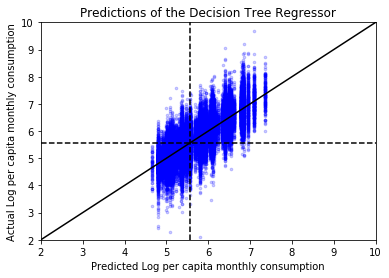

In [107]:
# Plot the predictions of the Decision Tree Regressor
fig, ax = plt.subplots()
ax.scatter(preds, y, c='blue', alpha = .2, s=7)
plt.xlim((2,10))
plt.ylim((2,10))
plt.title("Predictions of the Decision Tree Regressor")
ax.axhline(y=p, color='black', linestyle='dashed', linewidth=1.5)
ax.axvline(x=p, color='black', linestyle='dashed', linewidth=1.5)
plt.xlabel('Predicted Log per capita monthly consumption')
plt.ylabel('Actual Log per capita monthly consumption')
line = mlines.Line2D([0, 1], [0, 1], color='black', linewidth=1.5)
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()